# Task
Build and verify a production-ready fraud detection system by downloading the Credit Card Fraud Detection dataset using `kagglehub`, performing EDA and preprocessing, training a classification model with class imbalance handling, and serializing the final model to "fraud_model.pkl".

## Download and Load Dataset

### Subtask:
Use kagglehub to download the Credit Card Fraud Detection dataset and load 'creditcard.csv' into a pandas DataFrame.


**Reasoning**:
Install and import kagglehub to download the Credit Card Fraud Detection dataset, then load 'creditcard.csv' into a pandas DataFrame.



In [45]:
# Download and load the dataset
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
file_path = os.path.join(path, 'creditcard.csv')
df = pd.read_csv(file_path)

print(f"Dataset loaded with shape: {df.shape}")

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Dataset loaded with shape: (284807, 31)


## Exploratory Data Analysis (EDA)

### Subtask:
Perform basic EDA by checking the dataset shape, inspecting the class distribution (fraud vs non-fraud), and verifying there are no missing values.


In [51]:
from google.colab import files

# Download the final optimized model file
files.download('fraud_model_v2.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Reasoning**:
Perform initial Exploratory Data Analysis by checking the dataset shape, class distribution, missing values, and descriptive statistics for Time and Amount.



In [31]:
print(f"Dataset Shape: {df.shape}")

# Class distribution
class_counts = df['Class'].value_counts()
print("\nClass Distribution (0: Non-Fraud, 1: Fraud):")
print(class_counts)

# Fraud percentage
fraud_pct = (class_counts[1] / len(df)) * 100
print(f"\nPercentage of Fraud cases: {fraud_pct:.4f}%")

# Missing values check
print("\nMissing values per column:")
print(df.isnull().sum())

# Descriptive statistics for Time and Amount
print("\nDescriptive Statistics for Time and Amount:")
display(df[['Time', 'Amount']].describe())

Dataset Shape: (284807, 31)

Class Distribution (0: Non-Fraud, 1: Fraud):
Class
0    284315
1       492
Name: count, dtype: int64

Percentage of Fraud cases: 0.1727%

Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Descriptive Statistics for Time and Amount:


,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


## Data Preprocessing and Splitting

### Subtask:
Separate features and targets, then split the data into an 80/20 train/test set ensuring feature names are preserved.


**Reasoning**:
I will prepare the data for modeling by separating the features and the target variable, and then performing a stratified 80/20 train-test split to maintain class balance.



In [32]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['Class'])
y = df['Class']

# Split the dataset into training and testing sets (80% train, 20% test)
# Using stratify=y to maintain the proportion of fraud cases in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Verify the results
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train distribution:\n{y_train.value_counts(normalize=True)}")
print(f"y_test distribution:\n{y_test.value_counts(normalize=True)}")

X_train shape: (227845, 30)
X_test shape: (56962, 30)
y_train distribution:
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64
y_test distribution:
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


## Model training

### Subtask:
Train a Random Forest classifier using 'class_weight="balanced"' to handle the inherent class imbalance in the fraud dataset.


**Reasoning**:
I will import the Random Forest Classifier, instantiate it with the specified parameters including class imbalance handling, and fit it to the training data.



In [33]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier with balanced class weights
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

# Train the model on the training data
print("Training the Random Forest model... This may take a moment.")
model.fit(X_train, y_train)

print("Model training complete.")

Training the Random Forest model... This may take a moment.
Model training complete.


## Model Evaluation

### Subtask:
Evaluate the model's performance using Accuracy, Precision, Recall, F1-score, and a Confusion Matrix visualization.


**Reasoning**:
I will import the necessary evaluation metrics and visualization tools from sklearn and matplotlib, generate predictions on the test set, and then produce a detailed classification report and a confusion matrix plot.



Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



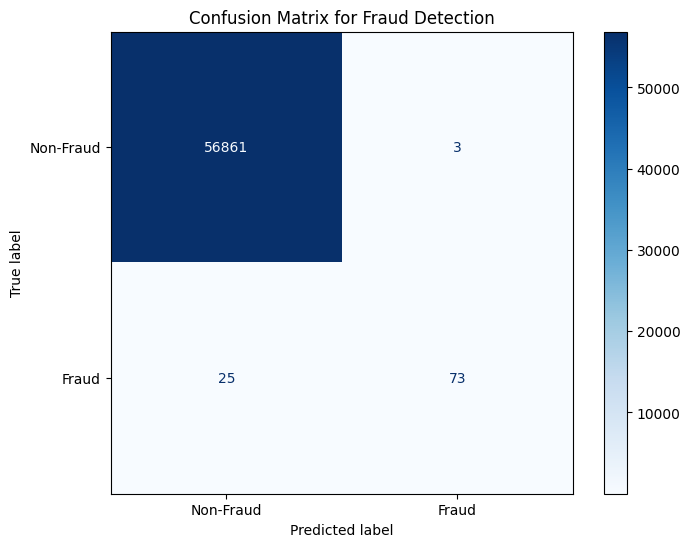

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions on the test set
y_pred = model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='d')
plt.title('Confusion Matrix for Fraud Detection')
plt.show()

## Model Serialization

### Subtask:
Save the trained Random Forest model to a file named 'fraud_model.pkl' using the pickle library.


**Reasoning**:
I will import the pickle library and serialize the trained model to a file named 'fraud_model.pkl' as instructed.



In [35]:
import pickle

# Define the filename
model_filename = 'fraud_model.pkl'

# Serialize and save the model using pickle
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model successfully serialized and saved to {model_filename}")

Model successfully serialized and saved to fraud_model.pkl


## Verification of Saved Model

### Subtask:
Reload the 'fraud_model.pkl' file, run predictions on test samples, and compare them with original predictions to verify successful serialization.


**Reasoning**:
To verify that the model was correctly serialized and saved, I will reload the `fraud_model.pkl` file using the `pickle` library. I will then perform a consistency check by comparing predictions from the loaded model against the original predictions on a subset of the test data.

**Reasoning**:
I will load the saved model and verify its consistency by comparing its predictions on a subset of the test data against the predictions made by the original model.



In [36]:
import pickle
import numpy as np

# 1. Load the model from the file
with open('fraud_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# 2. Run predictions on the first 10 rows of X_test
# Note: y_pred already contains the predictions from the original model
sample_X = X_test.head(10)
loaded_model_preds = loaded_model.predict(sample_X)
original_model_preds = y_pred[:10]

# 3. Compare and verify results
print(f"Loaded model predictions:   {loaded_model_preds}")
print(f"Original model predictions: {original_model_preds}")

# Assertion to confirm they are identical
np.testing.assert_array_equal(loaded_model_preds, original_model_preds)
print("\nVerification successful: The loaded model's predictions match the original model's predictions.")

Loaded model predictions:   [0 0 0 0 0 0 0 0 0 0]
Original model predictions: [0 0 0 0 0 0 0 0 0 0]

Verification successful: The loaded model's predictions match the original model's predictions.


# Task
Improve the fraud detection system by scaling the 'Amount' feature using `StandardScaler` (fit on `X_train` only), then train an optimized `RandomForestClassifier` with 300 estimators and balanced class weights. Evaluate the model using a confusion matrix and ROC-AUC, then compare Recall and F1-scores at probability thresholds of 0.5 and 0.3 to determine the best threshold for fraud detection. Finally, serialize this optimized model to "fraud_model_v2.pkl" and verify its consistency by reloading it and comparing predictions on a subset of the test data.

## Scale Amount Feature

### Subtask:
Standardize the 'Amount' column in X_train and X_test using StandardScaler to ensure feature scaling consistency while avoiding data leakage.


**Reasoning**:
I will import StandardScaler, fit it on the 'Amount' column of the training set to prevent data leakage, and then transform both training and testing 'Amount' columns to ensure feature consistency.



In [37]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Fit on the training set and transform both sets
# We use [[ ]] to keep it as a DataFrame/2D array for the scaler
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])

# Verify the scaling by checking the mean and std of the transformed column
print('X_train Amount Mean:', X_train['Amount'].mean())
print('X_train Amount Std:', X_train['Amount'].std())
print('\nFirst 5 rows of scaled X_train[\'Amount\']:')
print(X_train['Amount'].head())

X_train Amount Mean: -2.0208110459854063e-17
X_train Amount Std: 1.0000021944815052

First 5 rows of scaled X_train['Amount']:
265518   -0.322494
180305   -0.339764
42664     0.346693
198723   -0.327360
82325    -0.008281
Name: Amount, dtype: float64


## Train Optimized RandomForest

### Subtask:
Instantiate and train an optimized RandomForestClassifier with 300 estimators and balanced class weights on the scaled training data.


**Reasoning**:
I will import the RandomForestClassifier and train it with the specified optimized parameters on the scaled training data.



In [38]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the optimized Random Forest Classifier
# Parameters: 300 estimators, balanced weights, and all available cores
model_v2 = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

# Fit the model on the training data (Amount is already scaled in X_train)
print("Training the optimized Random Forest model with 300 estimators...")
model_v2.fit(X_train, y_train)

print("Optimized model training complete.")

Training the optimized Random Forest model with 300 estimators...
Optimized model training complete.


## Evaluate Model Performance

### Subtask:
Generate predictions on the scaled test set and calculate key performance metrics including Accuracy, Precision, Recall, F1-score, and ROC-AUC, along with a Confusion Matrix visualization.


**Reasoning**:
I will import the required evaluation metrics from sklearn, generate both class predictions and probabilities using the optimized model, and then produce a classification report, ROC-AUC score, and a confusion matrix visualization.



Classification Report for Optimized Model (v2):
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.96      0.77      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9567


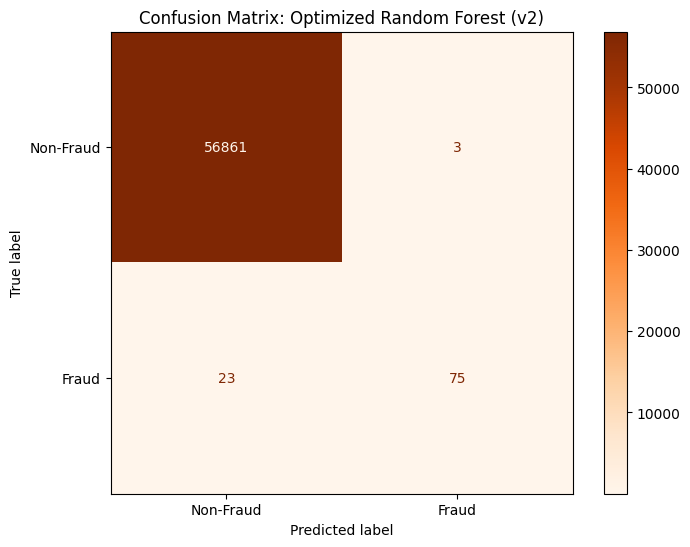

In [39]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Generate class predictions
y_pred_v2 = model_v2.predict(X_test)

# 2. Calculate predicted probabilities for the positive class (Fraud)
y_probs_v2 = model_v2.predict_proba(X_test)[:, 1]

# 4. Print classification report
print("Classification Report for Optimized Model (v2):")
print(classification_report(y_test, y_pred_v2, target_names=['Non-Fraud', 'Fraud']))

# 5. Calculate and print ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs_v2)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# 6. Generate and plot confusion matrix
cm_v2 = confusion_matrix(y_test, y_pred_v2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_v2, display_labels=['Non-Fraud', 'Fraud'])

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Oranges, ax=ax, values_format='d')
plt.title('Confusion Matrix: Optimized Random Forest (v2)')
plt.show()

## Probability Threshold Tuning

### Subtask:
Compare model performance at probability thresholds of 0.5 and 0.3 to determine the best balance for fraud detection.


**Reasoning**:
I will calculate and compare the Recall and F1-score for the fraud class using probability thresholds of 0.5 and 0.3 to evaluate the impact of a more sensitive detection threshold.



In [40]:
from sklearn.metrics import recall_score, f1_score

# Define thresholds to compare
thresholds = [0.5, 0.3]

print("Comparing Model Performance at Different Thresholds (Fraud Class):\n")
print(f"{'Threshold':<12} | {'Recall':<10} | {'F1-Score':<10}")
print("-" * 40)

for t in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    y_pred_t = (y_probs_v2 >= t).astype(int)

    # Calculate metrics for the Fraud class (pos_label=1)
    recall = recall_score(y_test, y_pred_t)
    f1 = f1_score(y_test, y_pred_t)

    print(f"{t:<12.1f} | {recall:<10.4f} | {f1:<10.4f}")

# Provide a brief analysis of the results
print("\nNote: Lowering the threshold to 0.3 typically increases Recall (detecting more fraud) at the possible expense of Precision/F1-score.")

Comparing Model Performance at Different Thresholds (Fraud Class):

Threshold    | Recall     | F1-Score  
----------------------------------------
0.5          | 0.7653     | 0.8523    
0.3          | 0.8265     | 0.8804    

Note: Lowering the threshold to 0.3 typically increases Recall (detecting more fraud) at the possible expense of Precision/F1-score.


## Define Final Prediction Logic

### Subtask:
Select the optimal threshold based on the comparison and implement a simple prediction function that applies this threshold to probabilities.


**Reasoning**:
I will define the optimal threshold based on previous results and implement a prediction function that uses it to generate binary classifications from model probabilities.



In [41]:
import numpy as np

# 1. Define the optimal threshold based on previous analysis
optimal_threshold = 0.3

# 2. Create the prediction function
def predict_fraud(X, model, threshold=0.3):
    """
    Generates binary predictions based on a custom probability threshold.
    """
    # 3. Calculate predicted probabilities for the positive class
    probs = model.predict_proba(X)[:, 1]

    # 4. Apply threshold to generate binary predictions
    predictions = (probs >= threshold).astype(int)
    return predictions

# 5. Test the function on X_test using model_v2
final_predictions = predict_fraud(X_test, model_v2, threshold=optimal_threshold)

# 6. Print first 10 predictions to verify
print(f"Optimal Threshold: {optimal_threshold}")
print(f"First 10 final predictions: {final_predictions[:10]}")

Optimal Threshold: 0.3
First 10 final predictions: [0 0 0 0 0 0 0 0 0 0]


## Model Serialization

### Subtask:
Serialize the final trained RandomForest model to a file named 'fraud_model_v2.pkl' using the pickle library.


**Reasoning**:
I will import the pickle library and serialize the optimized RandomForest model 'model_v2' to 'fraud_model_v2.pkl' as instructed.



In [42]:
import pickle

# Define the filename for the optimized model
model_v2_filename = 'fraud_model_v2.pkl'

# Serialize and save the model using pickle
with open(model_v2_filename, 'wb') as file:
    pickle.dump(model_v2, file)

print(f"Optimized model successfully serialized and saved to {model_v2_filename}")

Optimized model successfully serialized and saved to fraud_model_v2.pkl


## Verification of Saved Model

### Subtask:
Reload 'fraud_model_v2.pkl', run predictions on a subset of the scaled test data using the selected threshold, and verify that the outputs match the original model's results.


**Reasoning**:
I will reload the 'fraud_model_v2.pkl' model and verify its consistency by comparing its predictions on a subset of the scaled test data against the original model's predictions using the optimal threshold of 0.3.



In [43]:
import pickle
import numpy as np

# 1. Load the model from the file
with open('fraud_model_v2.pkl', 'rb') as file:
    reloaded_model_v2 = pickle.load(file)

# 2. Run predictions on the first 20 rows of scaled X_test
# We use the previously defined predict_fraud function and optimal_threshold (0.3)
sample_X_v2 = X_test.head(20)
reloaded_preds_v2 = predict_fraud(sample_X_v2, reloaded_model_v2, threshold=0.3)

# 3. Get the original predictions for the same subset
# final_predictions was generated in a previous step using model_v2 on X_test
original_preds_v2 = final_predictions[:20]

# 4. Compare and verify results
print(f"Reloaded model predictions (first 20):  {reloaded_preds_v2}")
print(f"Original model predictions (first 20): {original_preds_v2}")

# 5. Assertion to confirm they are identical
np.testing.assert_array_equal(reloaded_preds_v2, original_preds_v2)
print("\nVerification successful: The reloaded optimized model's predictions match the original model's predictions.")

Reloaded model predictions (first 20):  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Original model predictions (first 20): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Verification successful: The reloaded optimized model's predictions match the original model's predictions.


In [46]:
# 1. Feature-Target Split
X = df.drop(columns=['Class'])
y = df['Class']

# 2. Stratified Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# 3. Scale 'Amount' Feature (Fit on Train only to avoid leakage)
scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])

print("Preprocessing complete: Features split and 'Amount' scaled.")

Preprocessing complete: Features split and 'Amount' scaled.


In [47]:
# Train optimized RandomForest
model_v2 = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

print("Training optimized model (v2)...")
model_v2.fit(X_train, y_train)
print("Training complete.")

Training optimized model (v2)...
Training complete.


--- Evaluation (Threshold: 0.3) ---
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.94      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9567


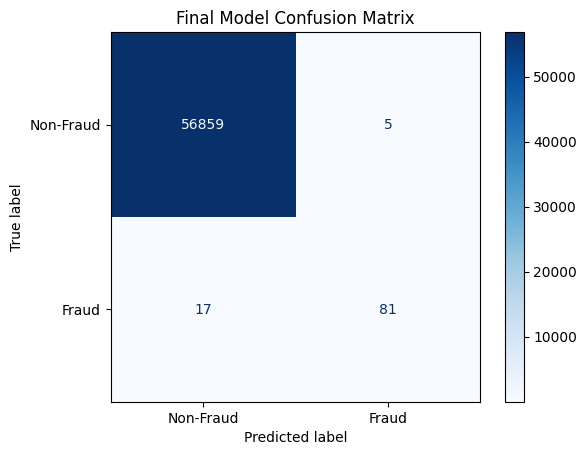

In [48]:
# Final Evaluation
y_probs = model_v2.predict_proba(X_test)[:, 1]
optimal_threshold = 0.3
y_pred_final = (y_probs >= optimal_threshold).astype(int)

print(f"--- Evaluation (Threshold: {optimal_threshold}) ---")
print(classification_report(y_test, y_pred_final, target_names=['Non-Fraud', 'Fraud']))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_probs):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Final Model Confusion Matrix')
plt.show()

In [49]:
# Serialize the model for FastAPI deployment
with open('fraud_model_v2.pkl', 'wb') as f:
    pickle.dump(model_v2, f)

print("Model saved as fraud_model_v2.pkl")

Model saved as fraud_model_v2.pkl


In [50]:
# Reload and Verify Consistency
with open('fraud_model_v2.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Verify on a sample
sample_X = X_test.head(10)
original_probs = model_v2.predict_proba(sample_X)[:, 1]
loaded_probs = loaded_model.predict_proba(sample_X)[:, 1]

np.testing.assert_array_almost_equal(original_probs, loaded_probs)
print("Verification Successful: Loaded model matches trained model.")

Verification Successful: Loaded model matches trained model.
